In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 #cv2 is the image processing toolkit
import os #lets python interact with computer's file system

#checking the version of libraries imported
print("numpy:",np.__version__)
print("matplotlib:",plt.matplotlib.__version__)
print("opencv:",cv2.__version__)

numpy: 2.0.2
matplotlib: 3.10.0
opencv: 4.12.0


In [2]:
#uploading bella's image
from google.colab import files
uploaded=files.upload()


Saving bella hadid.jpg to bella hadid.jpg


In [3]:
import cv2
img=cv2.imread('bella hadid.jpg')

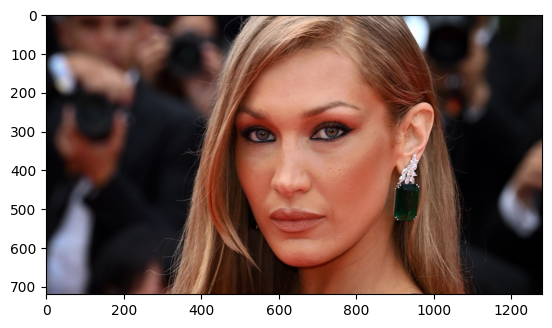

In [4]:
#converting the image in BGR Format to RGB Format
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import os
print(os.listdir("/content/drive/MyDrive/dataset"))


['Gigi Hadid', 'Bella Hadid', 'Kendall Jenner', 'cropped']


In [7]:
import os
import cv2
import shutil

# Paths (update if your Drive path is different)
path_to_data = '/content/drive/MyDrive/dataset'          # raw images
path_to_cr_data = '/content/drive/MyDrive/dataset/cropped'  # cropped images

# Adjust Haar cascade parameters
scale_factor = 1.1    # smaller = more sensitive to small faces
min_neighbors = 3     # smaller = allow more detections

# Load Haar cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Delete existing cropped folder and create a new one
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.makedirs(path_to_cr_data)

# Get list of celebrity folders
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir() and entry.name != 'cropped':
        img_dirs.append(entry.path)

# Function to crop faces with 2 eyes
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Image not loaded properly: {image_path}")
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scale_factor, min_neighbors)

    if len(faces) == 0:
        return None

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

    return None

# Loop through all celebrities and their images
for img_dir in img_dirs:
    celebrity_name = os.path.basename(img_dir)
    print(f"\nProcessing celebrity: {celebrity_name}")

    # Create folder for cropped images
    cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
    if not os.path.isdir(cropped_folder):
        os.makedirs(cropped_folder)
        print(f"Created folder: {cropped_folder}")

    # Process all images in this celebrity folder
    for img_name in os.listdir(img_dir):
        img_path = os.path.join(img_dir, img_name)
        cropped_face = get_cropped_image_if_2_eyes(img_path)

        if cropped_face is not None:
            save_path = os.path.join(cropped_folder, img_name)
            cv2.imwrite(save_path, cropped_face)
            print(f"Saved cropped face: {save_path}")
        else:
            print(f"Face not detected: {img_path}")


Processing celebrity: Gigi Hadid
Created folder: /content/drive/MyDrive/dataset/cropped/Gigi Hadid
Saved cropped face: /content/drive/MyDrive/dataset/cropped/Gigi Hadid/gigi hadid.jpg
Saved cropped face: /content/drive/MyDrive/dataset/cropped/Gigi Hadid/gigi hadid 2.jpg
Saved cropped face: /content/drive/MyDrive/dataset/cropped/Gigi Hadid/gigi hadid 3.jpg
Saved cropped face: /content/drive/MyDrive/dataset/cropped/Gigi Hadid/gigi hadid 4.webp
Saved cropped face: /content/drive/MyDrive/dataset/cropped/Gigi Hadid/gigi hadid 5.jpg
Saved cropped face: /content/drive/MyDrive/dataset/cropped/Gigi Hadid/gigi hadid 6.jpg
Saved cropped face: /content/drive/MyDrive/dataset/cropped/Gigi Hadid/gig hadid 7.jpg
Saved cropped face: /content/drive/MyDrive/dataset/cropped/Gigi Hadid/gig hadid 8.jpg
Saved cropped face: /content/drive/MyDrive/dataset/cropped/Gigi Hadid/gigi hadid 9.avif
Saved cropped face: /content/drive/MyDrive/dataset/cropped/Gigi Hadid/gigi hadid 10.webp
Saved cropped face: /content/d

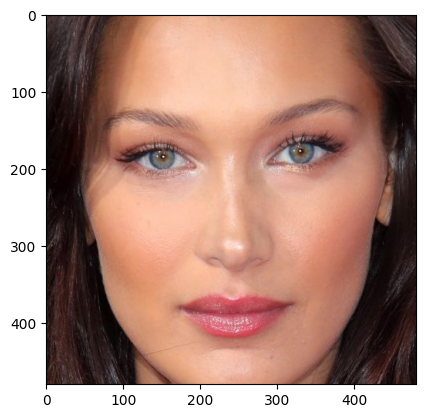

In [8]:
import cv2
import matplotlib.pyplot as plt
import os
x="/content/drive/MyDrive/dataset/cropped/Bella Hadid/bella hadid 7.jpg"
y=cv2.imread(x)
z=cv2.cvtColor(y,cv2.COLOR_BGR2RGB)
plt.imshow(z)
plt.show()


In [9]:
import pywt
import os
def w2d (img,wavelet='haar',level=1):
  imArray=img.copy()
  # Convert to grayscale if image is colored
  if len(imArray.shape) == 3:
    imArray = cv2.cvtColor(imArray, cv2.COLOR_BGR2GRAY)
  imArray = np.float32(imArray)
  imArray /= 255.0
  #decomposing image into appproximation +detail coefficients
  coeffs = pywt.wavedec2(imArray, wavelet, level=level)
  print(coeffs)
  coeffs_H = list(coeffs)
  coeffs_H[0] *= 0 #removing approximation part
#reconstructing image using only detailed coefficients(cH,cV,cD)
#reconstructed image is going to highlite edges and textures instead of smooth face regions
  imArray_H = pywt.waverec2(coeffs_H, wavelet)
  imArray_H *= 255
  imArray_H = np.uint8(imArray_H)

  return imArray_H #returnns the processed image(edges only,after wavelet transform)


In [10]:
#creating a dictionary named celebrity_file_names_dict
import os
path_to_cr_data = '/content/drive/MyDrive/dataset/cropped'
celebrity_file_names_dict={}
for celebrity_name in os.listdir(path_to_cr_data):
  celebrity_folder=os.path.join(path_to_cr_data,celebrity_name)
  if os.path.isdir(celebrity_folder):#check whether celebrity_folder is really a folder
    celebrity_file_names_dict[celebrity_name]=[]
    for file in os.listdir(celebrity_folder):
      celebrity_file_names_dict[celebrity_name].append(file)

In [11]:
print("Celebrities found:", celebrity_file_names_dict.keys())

Celebrities found: dict_keys(['Gigi Hadid', 'Bella Hadid', 'Kendall Jenner'])


In [12]:
# Create an empty dictionary
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1

print("Class mapping:", class_dict)#this gives a way to map each celebrity's name to a numerical class

Class mapping: {'Gigi Hadid': 0, 'Bella Hadid': 1, 'Kendall Jenner': 2}


In [13]:
x = []
y = []
skipped_files = []
for celebrity_name,training_files in celebrity_file_names_dict.items():
  print(f"/nProcessing celebrity: {celebrity_name}")
  valid_files_count=0
  for training_image in training_files:
    img_path = os.path.join(path_to_cr_data, celebrity_name, training_image) # Corrected file path
    if not os.path.exists(img_path):
      skipped_files.append(img_path)
      continue
    img=cv2.imread(img_path) # Use the correct file path
    #if the image couldn't be read
    if img is None:
      skipped_files.append(img_path)
      print(f"Error reading image: {img_path}")
      continue
    try:
      scaled_raw_img=cv2.resize(img,(32,32))#resizing og.image
      img_har=w2d(img,'db1',5)#applying wavelet transform
      scaled_img_har=cv2.resize(img_har,(32,32))
      raw_features=scaled_raw_img.reshape(32*32*3,1)
      har_features=scaled_img_har.reshape(32*32,1)
      combined_img=np.vstack((raw_features,har_features))
      x.append(combined_img.flatten())
      y.append(class_dict[celebrity_name])
      valid_files_count+=1
    except Exception as e:
      skipped_files.append(img_path)
      print(f"Error processing image: {img_path}:{e}")
      continue
  print(f"successfully processed {valid_files_count} images for {celebrity_name}")

  #converting to numpy arrays
x=np.array(x)
y=np.array(y)

print(f"\n=== FEATURE ENGINEERING SUMMARY ===")
print(f"Total samples: {len(x)}")#X is a list of feature vectors.so len(x) is the number of usable images that have been successfully prepared.thatis,how many training data we actually have.
print(f"Feature vector size: {x.shape[1] if len(x) > 0 else 0}")
print(f"Classes: {len(class_dict)}")
print(f"Skipped files: {len(skipped_files)}")

Streaming output truncated to the last 5000 lines.
         2.38872552e+00,  3.06936264e+00,  1.14509773e+00,
        -3.12744945e-01, -9.14215669e-02,  5.24510264e-01,
         2.22549170e-01,  3.52934301e-02,  2.17156410e-01,
         2.40441188e-01, -5.68872571e-01, -1.83824338e-02,
        -1.53921962e-01,  1.06887257e+00,  1.51838231e+00,
         1.00735283e+00,  7.12009728e-01,  8.88480306e-01,
        -1.53676331e-01, -2.70098239e-01, -3.78431410e-01,
         6.37264550e-03],
       [-9.66911495e-01, -1.89215407e-01, -1.54411882e-01,
        -1.61176467e+00, -2.01004910e+00, -1.85539174e+00,
        -7.99754977e-01,  1.17867637e+00, -1.19362712e+00,
        -1.34044123e+00, -7.85539687e-01, -3.86519462e-01,
         9.58331600e-02, -2.00735331e-01,  8.01467821e-02,
        -2.33578339e-01, -4.89460945e-01, -7.08329976e-02,
        -2.02352929e+00,  3.60784411e-01, -2.37009764e-01,
        -2.76642132e+00, -7.04901993e-01, -4.26960886e-01,
        -6.91667199e-01, -1.88480705e-

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def optimize_models(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    print(f"Training samples: {len(X_train)}")
    print(f"Testing samples: {len(X_test)}")
    print(f"Feature dimensions: {X.shape[1]}")

    # Define model configurations with corrected parameter names
    model_configs = {
        'SVM_RBF': {
            'pipeline': Pipeline([
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),  # Keep 95% variance
                ('svc', SVC(probability=True, random_state=random_state))
            ]),
            'params': {
                'pca__n_components': [0.90, 0.95, 0.99, None],
                'svc__C': [0.1, 1, 10, 100, 1000],
                'svc__kernel': ['rbf'],
                'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
            }
        },
        'Random_Forest': {
            'pipeline': Pipeline([
                ('scaler', StandardScaler()),  # optional
                ('pca', PCA(n_components=0.95)),
                ('rf', RandomForestClassifier(random_state=random_state))
           ]),
           'params': {
                'pca__n_components': [0.90, 0.95, 0.99, None],
                'rf__n_estimators': [50, 100, 200],
                'rf__max_depth': [None, 10, 20, 50]
            }
        },
        'KNN': {
           'pipeline': Pipeline([
               ('scaler', StandardScaler()),
               ('pca', PCA(n_components=0.95)),
               ('knn', KNeighborsClassifier())
          ]),
          'params': {
               'pca__n_components': [0.90, 0.95, 0.99, None],
               'knn__n_neighbors': [3, 5, 7, 9],
               'knn__weights': ['uniform', 'distance']
            }
        },
        'SVM_Linear': {
            'pipeline': Pipeline([
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('svc', SVC(probability=True, random_state=random_state))
            ]),
            'params': {
                'pca__n_components': [0.90, 0.95, 0.99, None],
                'svc__C': [0.1, 1, 10, 100],
                'svc__kernel': ['linear']
            }
        },

        'Logistic_Regression': {
            'pipeline': Pipeline([
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('lr', LogisticRegression(random_state=random_state, max_iter=1000))
            ]),
            'params': {
                'pca__n_components': [0.90, 0.95, 0.99, None],
                'lr__C': [0.01, 0.1, 1, 10, 100],
                'lr__solver': ['liblinear', 'lbfgs'],
                'lr__penalty': ['l2']
            }
        }
    }

    results = {}
    best_models = {}


    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

    print("\n" + "="*60)
    print("HYPERPARAMETER TUNING AND MODEL EVALUATION")
    print("="*60)

    for model_name, config in model_configs.items():
        print(f"\n🔍 Optimizing {model_name}...")

        # Grid search with cross-validation
        grid_search = GridSearchCV(
            config['pipeline'],# gridsearch will train and evaluate based on this pipeline
            config['params'],#gridsearch will automatically search all combinations in this grid
            cv=cv,#ensures reliable evaluation across 5 folds while keeping class proportions
            scoring='accuracy',#gridsearch cv will pick the best hyperparameters based on accuracy
            n_jobs=-1,#use all the CPY scores to spped up the gridsearch
            verbose=1#print progress messages while running the search
        )

        # Fit the grid search
        grid_search.fit(X_train, y_train)

        # Get the best model
        best_model = grid_search.best_estimator_
        best_models[model_name] = best_model

        # Predictions
        y_pred = best_model.predict(X_test)
        y_pred_proba = best_model.predict_proba(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Cross-validation score
        cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='accuracy')

        # Store results
        results[model_name] = {
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_,
            'test_accuracy': accuracy,
            'test_f1': f1,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        }

        print(f"✅ {model_name} Results:")
        print(f"   Best CV Score: {grid_search.best_score_:.4f}")
        print(f"   Test Accuracy: {accuracy:.4f}")
        print(f"   Test F1-Score: {f1:.4f}")
        print(f"   CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
        print(f"   Best Parameters: {grid_search.best_params_}")

    # Find the best overall model
    best_model_name = max(results.keys(), key=lambda k: results[k]['test_accuracy'])
    best_overall_model = best_models[best_model_name]

    print(f"\n🏆 BEST MODEL: {best_model_name}")
    print(f"   Test Accuracy: {results[best_model_name]['test_accuracy']:.4f}")
    print(f"   Test F1-Score: {results[best_model_name]['test_f1']:.4f}")

    return results, best_models, X_test, y_test, best_model_name

In [15]:
results, best_models, X_test, y_test, best_model_name = optimize_models(x, y)

Training samples: 61
Testing samples: 16
Feature dimensions: 4096

HYPERPARAMETER TUNING AND MODEL EVALUATION

🔍 Optimizing SVM_RBF...
Fitting 5 folds for each of 120 candidates, totalling 600 fits
✅ SVM_RBF Results:
   Best CV Score: 0.7538
   Test Accuracy: 0.5625
   Test F1-Score: 0.5625
   CV Score: 0.7538 (+/- 0.1832)
   Best Parameters: {'pca__n_components': None, 'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

🔍 Optimizing Random_Forest...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
✅ Random_Forest Results:
   Best CV Score: 0.7064
   Test Accuracy: 0.5000
   Test F1-Score: 0.4547
   CV Score: 0.7064 (+/- 0.1535)
   Best Parameters: {'pca__n_components': 0.9, 'rf__max_depth': None, 'rf__n_estimators': 100}

🔍 Optimizing KNN...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
✅ KNN Results:
   Best CV Score: 0.5897
   Test Accuracy: 0.6875
   Test F1-Score: 0.6737
   CV Score: 0.5897 (+/- 0.1085)
   Best Parameters: {'knn__n_neighbors': 

In [16]:
def detailed_evaluation(results, best_models, X_test, y_test, best_model_name, class_names):
    best_model = best_models[best_model_name]
    y_pred = results[best_model_name]['y_pred']

    print(f"\n📊 DETAILED EVALUATION - {best_model_name}")
    print("="*60)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(12, 5))

    # Plot confusion matrix
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {best_model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # Plot model comparison
    plt.subplot(1, 2, 2)
    model_names = list(results.keys())
    test_scores = [results[name]['test_accuracy'] for name in model_names]
    cv_scores = [results[name]['cv_mean'] for name in model_names]

    x = np.arange(len(model_names))
    width = 0.35

    plt.bar(x - width/2, test_scores, width, label='Test Accuracy', alpha=0.8)
    plt.bar(x + width/2, cv_scores, width, label='CV Accuracy', alpha=0.8)

    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Comparison')
    plt.xticks(x, model_names, rotation=45)
    plt.legend()
    plt.tight_layout()

    plt.show()

    return best_model


📊 DETAILED EVALUATION - SVM_Linear

Classification Report:
                precision    recall  f1-score   support

    Gigi Hadid       0.80      0.67      0.73         6
   Bella Hadid       0.67      0.80      0.73         5
Kendall Jenner       0.80      0.80      0.80         5

      accuracy                           0.75        16
     macro avg       0.76      0.76      0.75        16
  weighted avg       0.76      0.75      0.75        16



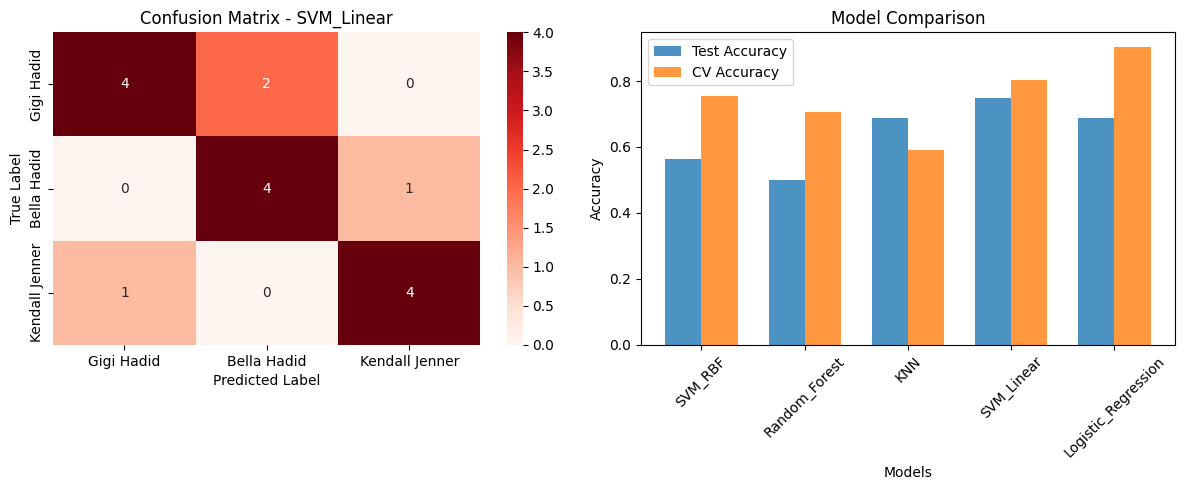

In [17]:
reverse_class_dict = {v: k for k, v in class_dict.items()}
class_names = [reverse_class_dict[i] for i in sorted(reverse_class_dict.keys())]

best_model = detailed_evaluation(results, best_models, X_test, y_test, best_model_name, class_names)

In [19]:
#saving trained model
!pip install joblib
import joblib

# Save model
joblib.dump(best_models['SVM_Linear'], "svm_linear_face_model.pkl")

# Later, load it back
model = joblib.load("svm_linear_face_model.pkl")


In [20]:
import cv2
import numpy as np

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image: {image_path}")

    # Step 1: Crop the face with Haarcascade (same as training)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 3)

    if len(faces) == 0:
        raise ValueError("No face detected in the image.")

    # Take the first detected face
    x, y, w, h = faces[0]
    roi_color = img[y:y+h, x:x+w]

    # Step 2: Resize to 32x32
    scaled_raw_img = cv2.resize(roi_color, (32,32))

    # Step 3: Wavelet transform
    img_har = w2d(roi_color, 'db1', 5)
    scaled_img_har = cv2.resize(img_har, (32,32))

    # Step 4: Combine features
    raw_features = scaled_raw_img.reshape(32*32*3, 1)
    har_features = scaled_img_har.reshape(32*32, 1)
    combined_img = np.vstack((raw_features, har_features))

    return combined_img.flatten().reshape(1, -1)  # shape (1, n_features)


In [21]:
print(class_dict)

{'Gigi Hadid': 0, 'Bella Hadid': 1, 'Kendall Jenner': 2}


In [24]:
# Load  trained model
model = joblib.load("svm_linear_face_model.pkl")

# Class mapping
class_dict = {'Gigi Hadid': 0, 'Bella Hadid': 1, 'Kendall Jenner': 2}
reverse_class_dict = {v:k for k,v in class_dict.items()}

# Example: Predict
test_img_path = "/content/drive/MyDrive/test_images/kendall_test.png"
features = preprocess_image(test_img_path)

prediction = model.predict(features)[0]
predicted_name = reverse_class_dict[prediction]

print(f"Predicted Celebrity: {predicted_name}")


[array([[ 2.7736516, 10.370708 , 23.663109 , 25.39252  , 23.249874 ,
        14.061396 ,  4.147181 ,  6.0786753],
       [ 2.0289211, 19.907228 , 25.042645 , 26.891785 , 26.452204 ,
        22.541542 ,  7.4072294,  5.328553 ],
       [ 7.26593  , 17.242767 , 11.122669 , 20.97034  , 21.282475 ,
        14.391051 ,  7.03321  ,  2.641789 ],
       [18.661026 , 23.802078 , 21.5973   , 23.011026 , 20.156002 ,
        16.537989 , 10.770097 ,  1.3165438],
       [11.643993 , 22.769482 , 22.591053 , 22.124016 , 20.489212 ,
        23.977448 , 16.997055 ,  0.6014705],
       [ 1.9098036, 20.42561  , 18.402815 , 20.608086 , 17.742275 ,
        17.980267 , 12.906616 ,  0.6671568],
       [ 2.2566175, 16.402817 , 22.461637 , 19.617767 , 18.075241 ,
        20.695217 ,  4.2817397,  1.6299016],
       [ 3.5379896, 16.187986 , 21.237375 , 24.69779  , 22.831001 ,
        16.113358 ,  0.8073528,  1.4743872]], dtype=float32), (array([[ 1.2753674 , -2.6984072 , -0.7753678 , -0.99007463, -2.6484065 ,
    

In [27]:
# Load  trained model
model = joblib.load("svm_linear_face_model.pkl")

# Class mapping
class_dict = {'Gigi Hadid': 0, 'Bella Hadid': 1, 'Kendall Jenner': 2}
reverse_class_dict = {v:k for k,v in class_dict.items()}

# Example: Predict
test_img_path = "/content/drive/MyDrive/test_images/gigi hadid_test.jpg"
features = preprocess_image(test_img_path)

prediction = model.predict(features)[0]
predicted_name = reverse_class_dict[prediction]

print(f"Predicted Celebrity: {predicted_name}")


[array([[13.542891 , 14.417032 , 14.996199 , 18.130512 , 17.669605 ,
        19.892277 , 17.062252 , 20.716297 , 22.699383 , 23.557594 ,
        22.806492 , 19.214214 , 17.220707 , 15.883331 , 12.272792 ,
        13.001101 , 13.5049   ,  9.010783 ],
       [12.388599 , 13.446567 , 15.561394 , 19.412865 , 14.170955 ,
        17.550488 , 22.293503 , 23.958454 , 24.652325 , 24.937496 ,
        25.14914  , 24.455513 , 22.124016 , 16.304777 , 13.043994 ,
        12.526714 , 13.074141 , 14.8475485],
       [11.374018 , 12.408821 , 14.281492 , 15.69289  , 14.540194 ,
        20.360413 , 23.408207 , 24.05833  , 24.276833 , 24.587864 ,
        24.717764 , 24.241417 , 24.184309 , 23.824383 , 16.491787 ,
        11.534803 , 10.377571 ,  9.963234 ],
       [10.65772  , 11.122914 , 13.039336 , 12.111273 , 18.641788 ,
        22.126713 , 23.854408 , 24.145094 , 24.013355 , 24.593746 ,
        24.868011 , 24.075119 , 23.911638 , 22.480145 , 19.687866 ,
         9.371077 ,  7.4732833,  6.596567 ],
   